# **Classification**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/SD201/heart_2020_cleaned.csv")

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,4,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,4,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,4,0.304348,0,0,0


In [ ]:
df.duplicated().sum()

18078

In [ ]:
FEATURES = list(df.columns[1:])

FEATURES

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
Y_name = 'HeartDisease'
Y_name

'HeartDisease'

In [ ]:
X = df[FEATURES]
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,4,0.173913,1,0,1
1,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,4,0.260870,0,0,0
2,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,4,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.185802,1,0,0,0.233333,0.0,1,1,8,3,2,0,1,0.217391,1,0,0
319791,0.215139,1,0,0,0.000000,0.0,0,1,3,3,0,1,4,0.173913,1,0,0
319792,0.147531,0,0,0,0.000000,0.0,0,0,5,3,0,1,2,0.217391,0,0,0
319793,0.250996,0,0,0,0.000000,0.0,0,0,1,3,0,0,2,0.478261,0,0,0


In [ ]:
Y = df[Y_name]
Y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [ ]:
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)

In [ ]:
test_frac=0.3
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac, random_state=0)

### Utils Functions

In [ ]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {'accuracy': acc, 
            'precision': prec,
            'recall': recall,
            'f1_score': f1}

In [ ]:
def build_model(classifier_fn,
                params):
       
    # model = classifier_fn(**params)
    # model.fit(x_train, y_train)

    clf = GridSearchCV(classifier_fn(), params, cv = 10, scoring='accuracy')
    clf.fit(x_train, y_train)

    print("best params: "+str(clf.best_params_))
    
    model = classifier_fn(**clf.best_params_,random_state=0)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab,
            "best_params_":clf.best_params_}

In [ ]:
result_dict={}

In [ ]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
       
        print()
        print("Confusion Matrix")
        print(result_dict[key]["confusion_matrix"]) 

        print("----------------------------------------------")

### Training

In [ ]:
params = {"penalty": ["l2", "none"],
          "solver": ["newton-cg","lbfgs","sag"]
          }

model = LogisticRegression

result_dict['logistic'] = build_model(model,params)

best params: {'penalty': 'none', 'solver': 'sag'}


In [ ]:
params = {"penalty": ["l1","l2"],
          "loss": ["squared_hinge"]
          }
          
model = LinearSVC

result_dict['linear_svc'] = build_model(model,params)

best params: {'loss': 'squared_hinge', 'penalty': 'l2'}


In [ ]:
params =  {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']
           }
           
model = DecisionTreeClassifier

result_dict['decision_tree'] = build_model(model,params)

best params: {'criterion': 'gini', 'max_features': 'sqrt'}


In [ ]:
params = { 
    'n_estimators': [10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
    }

model = RandomForestClassifier

result_dict['random_forest'] = build_model(model,params)

best params: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}


In [ ]:
compare_results()

Classification:  logistic

Training data
accuracy 0.7421749432081878
precision 0.7296428737286955
recall 0.768475267670666
f1_score 0.7485557876882837

Test data
accuracy 0.7413510093813763
precision 0.7291913299898836
recall 0.7701794868880225
f1_score 0.7491251637726587

Confusion Matrix
y_test      0      1
y_pred              
0       62318  20218
1       25163  67755
----------------------------------------------
Classification:  linear_svc

Training data
accuracy 0.7430787268863431
precision 0.7219727732956477
recall 0.7896150140132747
f1_score 0.7542804278909387

Test data
accuracy 0.7417271763539162
precision 0.7213010998132393
recall 0.7902310936310004
f1_score 0.7541943987892793

Confusion Matrix
y_test      0      1
y_pred              
0       60620  18454
1       26861  69519
----------------------------------------------
Classification:  decision_tree

Training data
accuracy 0.9983414348176556
precision 0.9999313045270317
recall 0.9967473550861095
f1_score 0.9983367912072

### Cross-validation for Random Forest

In [ ]:
clf = RandomForestClassifier(**{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10})
cross_val_score(clf, X, Y, cv = 5, scoring = 'f1_macro',error_score="raise")

array([0.75115685, 0.90923117, 0.90829104, 0.90642776, 0.9104961 ])

### Plotting The Decision Tree

[Text(0.5, 0.9, 'PhysicalActivity <= 0.5\ngini = 0.5\nsamples = 409390\nvalue = [204941, 204449]'),
 Text(0.25, 0.7, 'PhysicalHealth <= 0.0\ngini = 0.421\nsamples = 143842\nvalue = [43312, 100530]'),
 Text(0.125, 0.5, 'SleepTime <= 0.217\ngini = 0.5\nsamples = 53073\nvalue = [26414, 26659]'),
 Text(0.0625, 0.3, 'GenHealth <= 3.5\ngini = 0.442\nsamples = 12474\nvalue = [8363, 4111]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'SleepTime <= 0.261\ngini = 0.494\nsamples = 40599\nvalue = [18051, 22548]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'MentalHealth <= 1.0\ngini = 0.303\nsamples = 90769\nvalue = [16898, 73871]'),
 Text(0.3125, 0.3, 'Asthma <= 0.5\ngini = 0.277\nsamples = 85743\nvalue = [14261, 71482]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'AlcoholDrinking <= 0.5\ngini = 0.499\nsamples = 5026\nvalue = [2637, 2389]'),
 

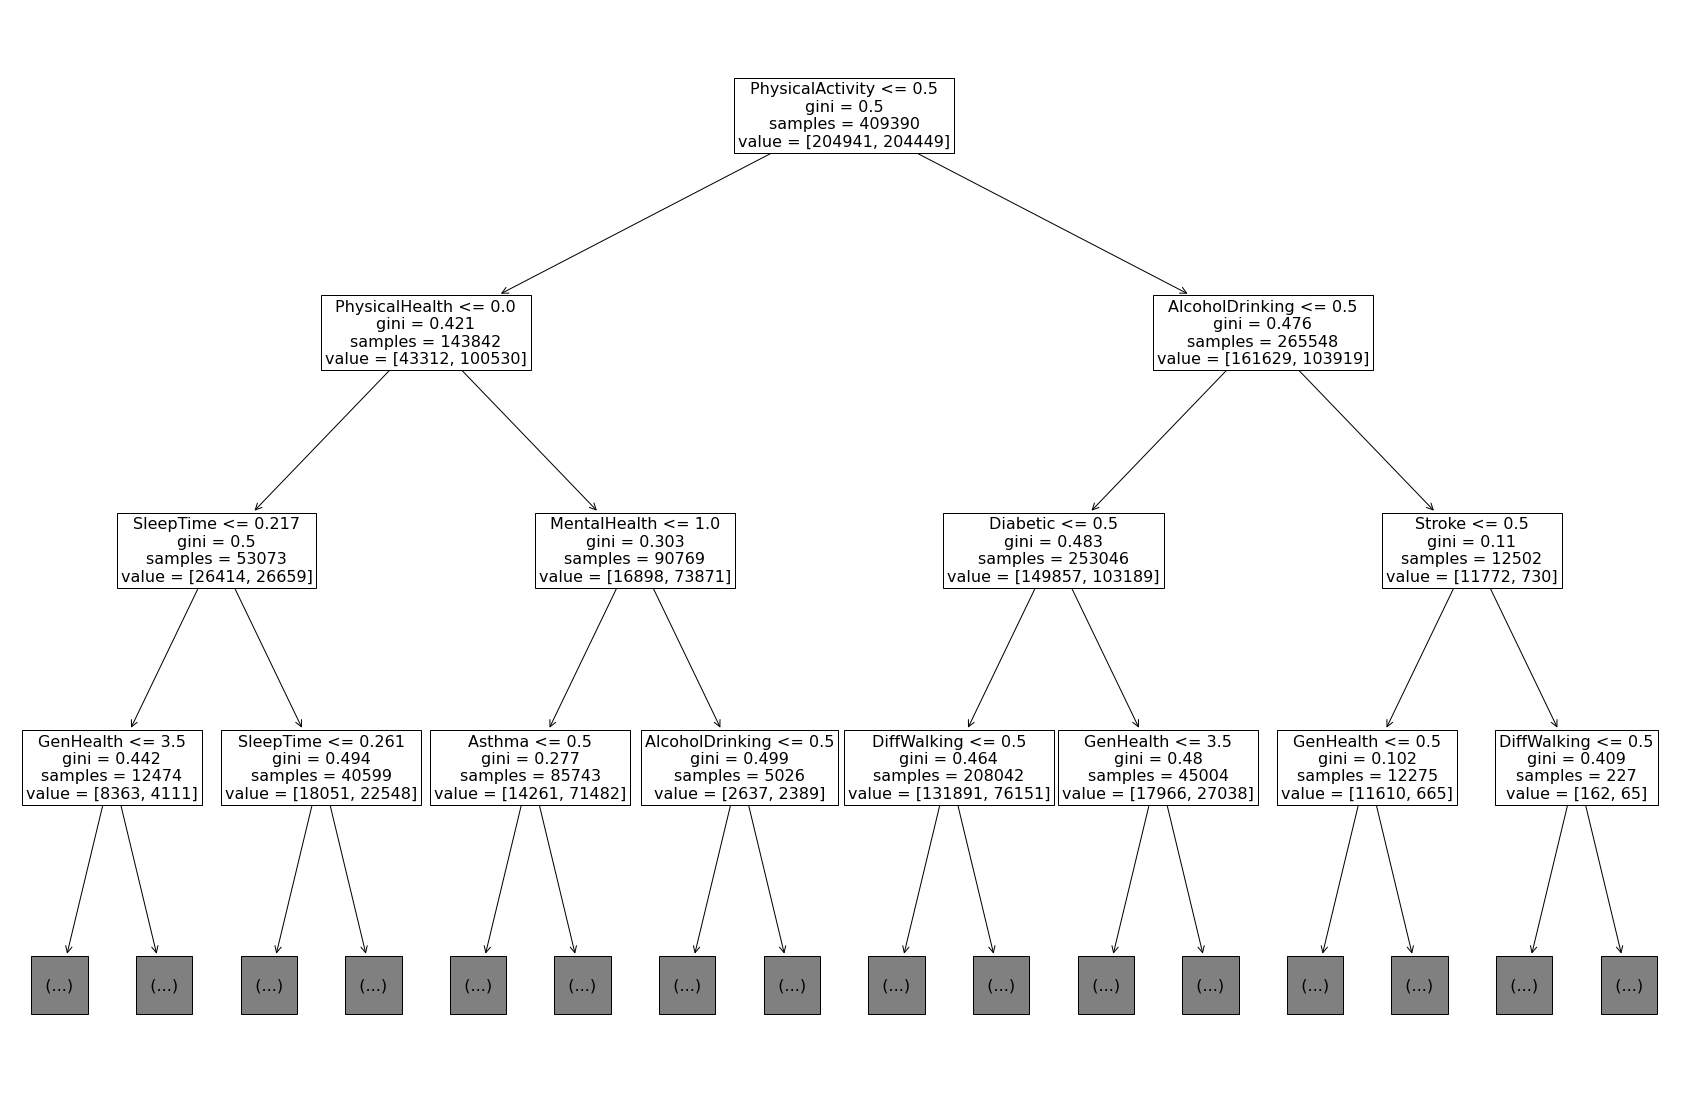

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))

clf = DecisionTreeClassifier(criterion= 'gini', max_features= 'sqrt', random_state=0)
clf.fit(x_train, y_train)
plot_tree(clf,max_depth=3, fontsize=16, ax=ax, feature_names=x_train.columns)